In [ ]:
import numpy as np,cv2,matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from matplotlib import style

In [ ]:
img=cv2.imread('hepburn.jpg')

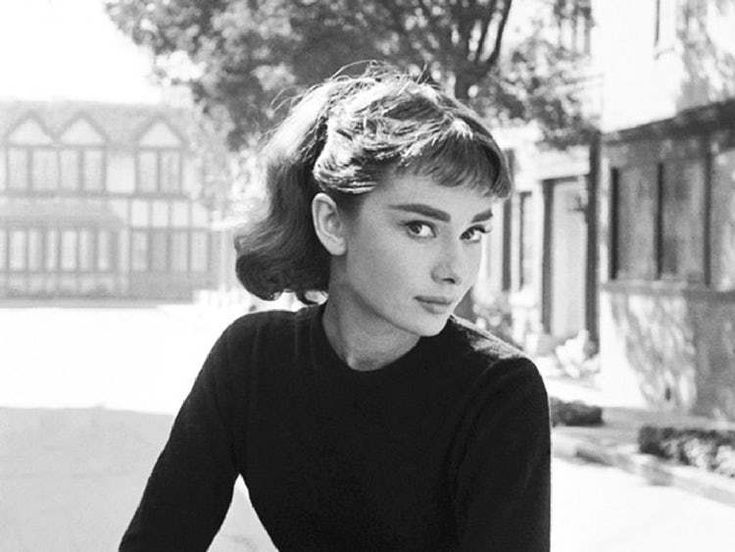

In [ ]:
cv2_imshow(img)

In [ ]:
img.shape

(552, 735, 3)

In [ ]:
img1=img.flatten()

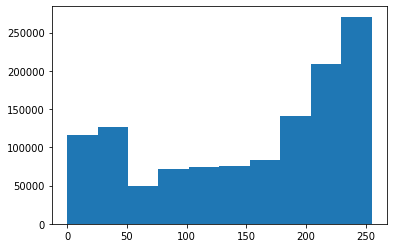

In [ ]:
plt.hist(img1)
plt.show()

In [ ]:
img2=255-img1

In [ ]:
img3=img2.reshape(552, 735, 3)

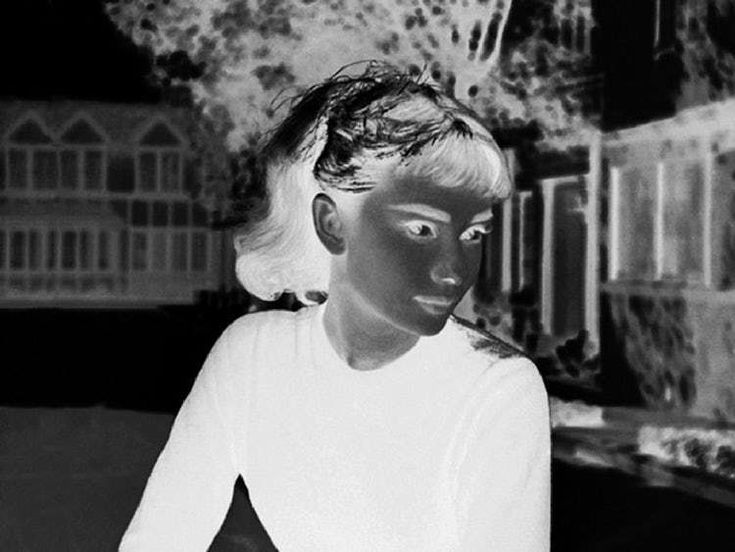

In [ ]:
cv2_imshow(img3)                                    #1. negative image

In [ ]:
#2.  Contrast stretching
a=50
b=150
Alpha=0.2
Beta=2
Gamma=1
Ya=30
Yb=200

In [ ]:
img4=img.tolist()

In [ ]:
img5=[]
for i in img1:
  j=int(i)
  if(j>=0 and j<a):
    img5.append(Alpha*j)
  elif(j>=a and j<b):
    temp=Beta*(j-a)+Ya
    img5.append(temp)
  else:
    temp=Gamma*(j-b)+Yb
    img5.append(temp)

In [ ]:
img6=np.array(img5)

In [ ]:
img7=img6.reshape(552, 735, 3)

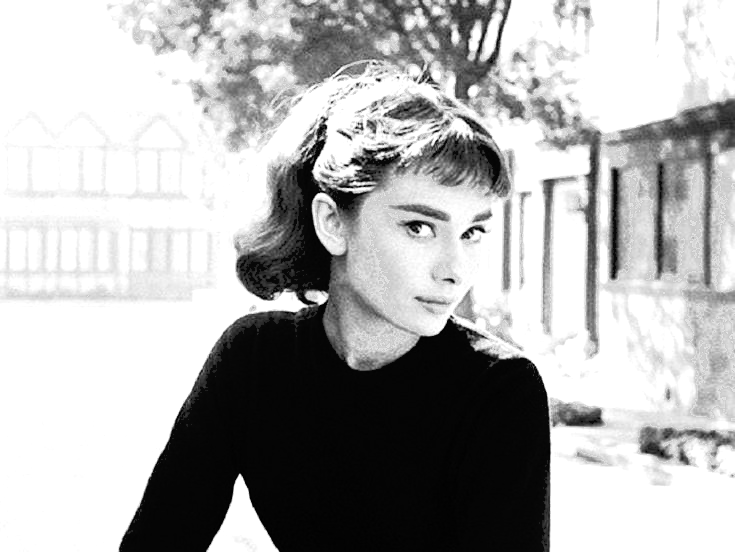

In [ ]:
cv2_imshow(img7)

In [ ]:
#3. Clipping

img8=[]
for i in img1:
  j=int(i)
  if(j>=0 and j<a):
    img8.append(0)
  elif(j>=a and j<b):
    temp=Beta*(j-a)
    img8.append(temp)
  else:
    temp=Beta*(b-a)
    img8.append(temp)

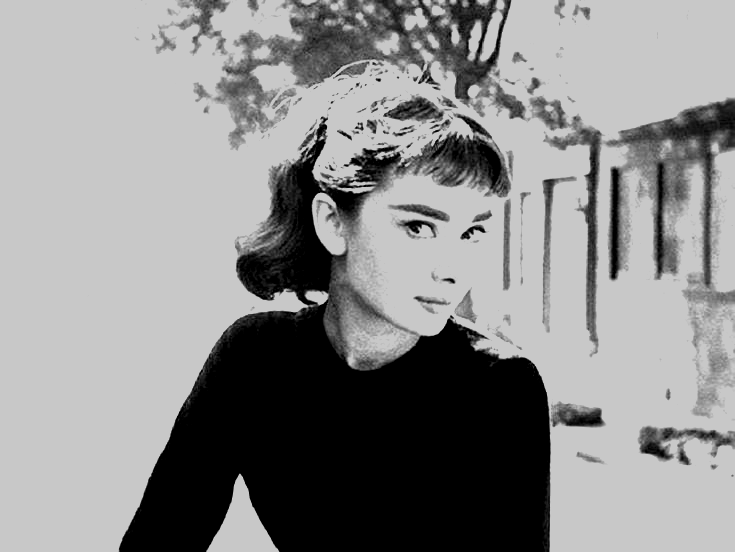

In [ ]:
img9=np.array(img8)
img10=img9.reshape(552, 735, 3)
cv2_imshow(img10)

In [ ]:
img11=1+img1

In [ ]:
img12=np.log(img11)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [ ]:
img13=100*img12

In [ ]:
img14=img13.reshape(552, 735, 3)

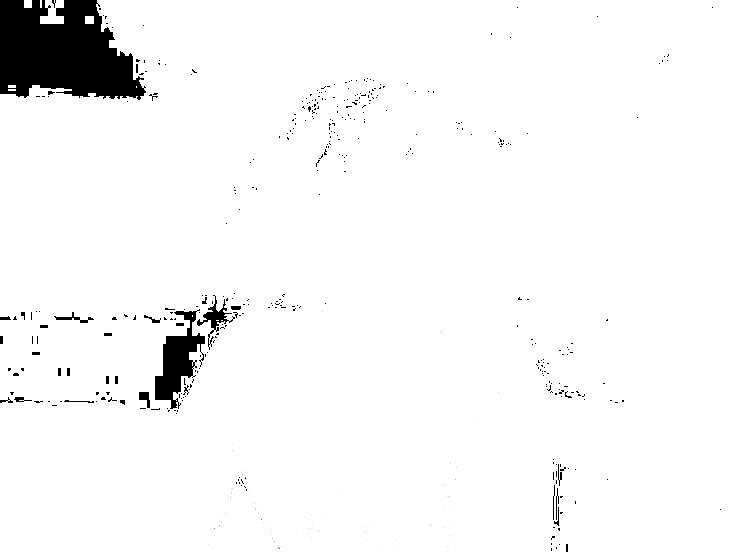

In [ ]:
cv2_imshow(img14)

In [ ]:
#Padding
img15=cv2.imread('im4.jpg')

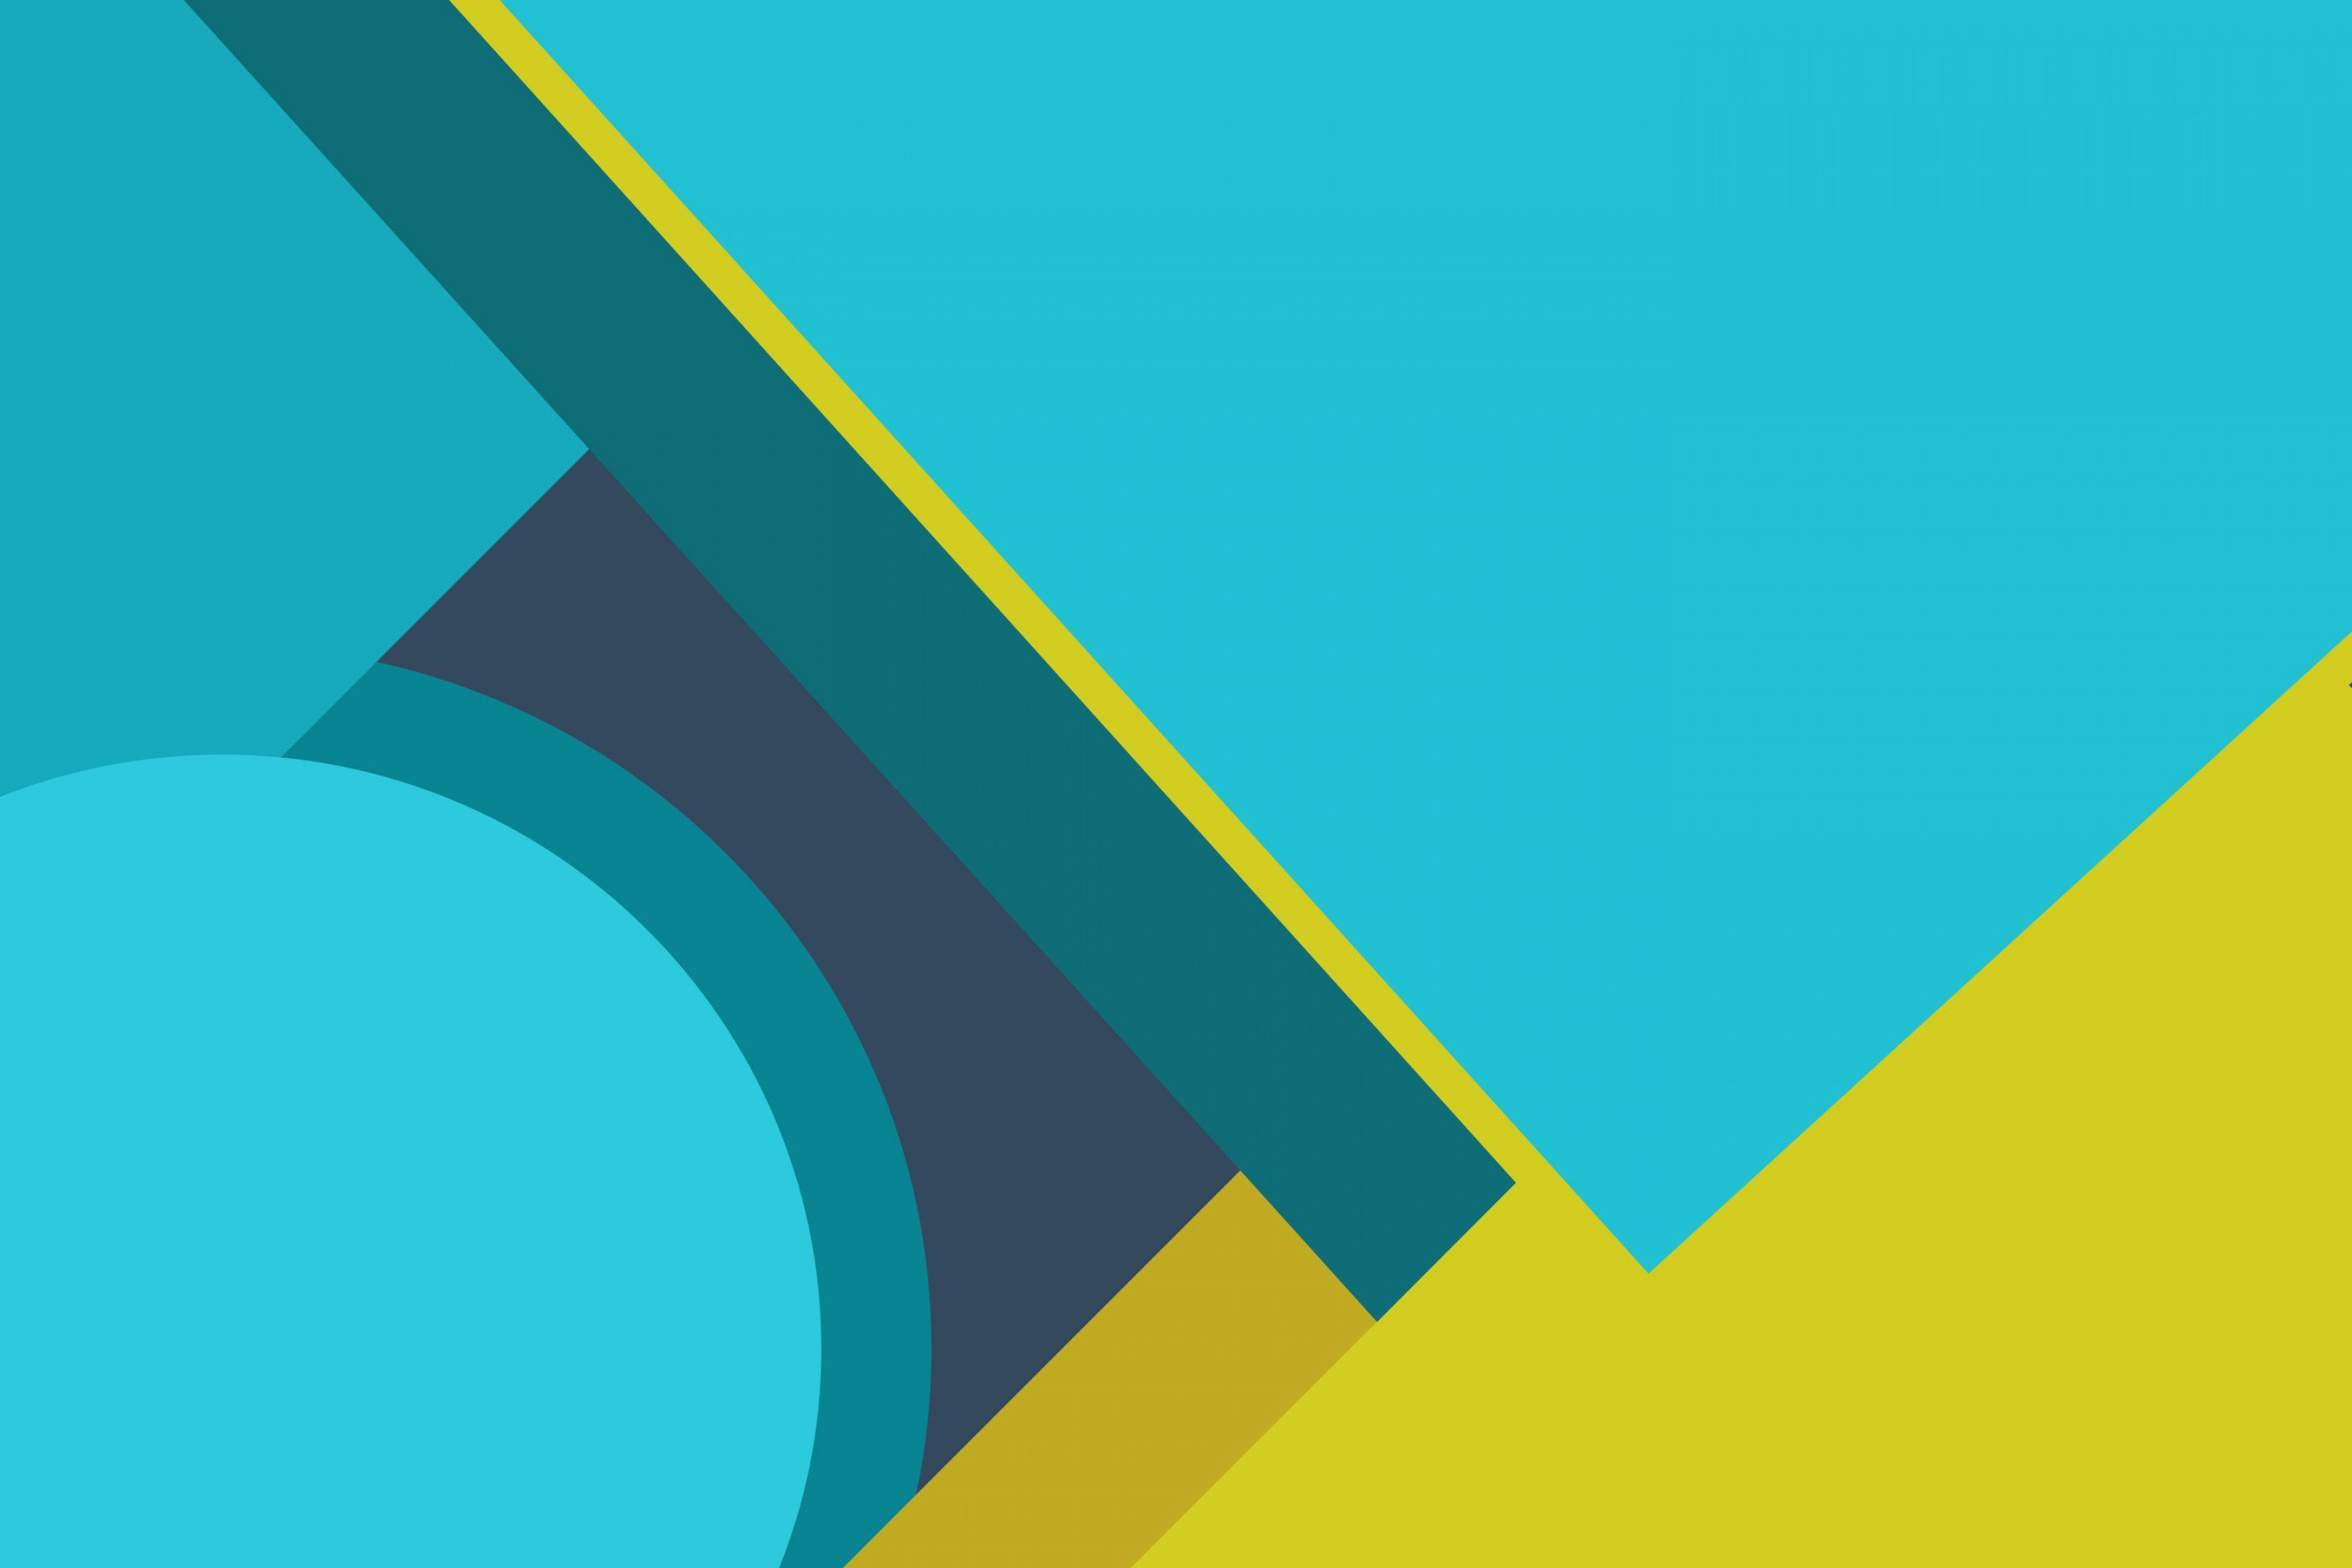

In [ ]:
cv2_imshow(img15)

In [ ]:
img15.shape

(2160, 3240, 3)

In [ ]:
Height,Width, Dim=img15.shape

In [ ]:
H_Pad=Height+2
W_Pad=Width+2

In [ ]:
img16=np.zeros((H_Pad,W_Pad,Dim))

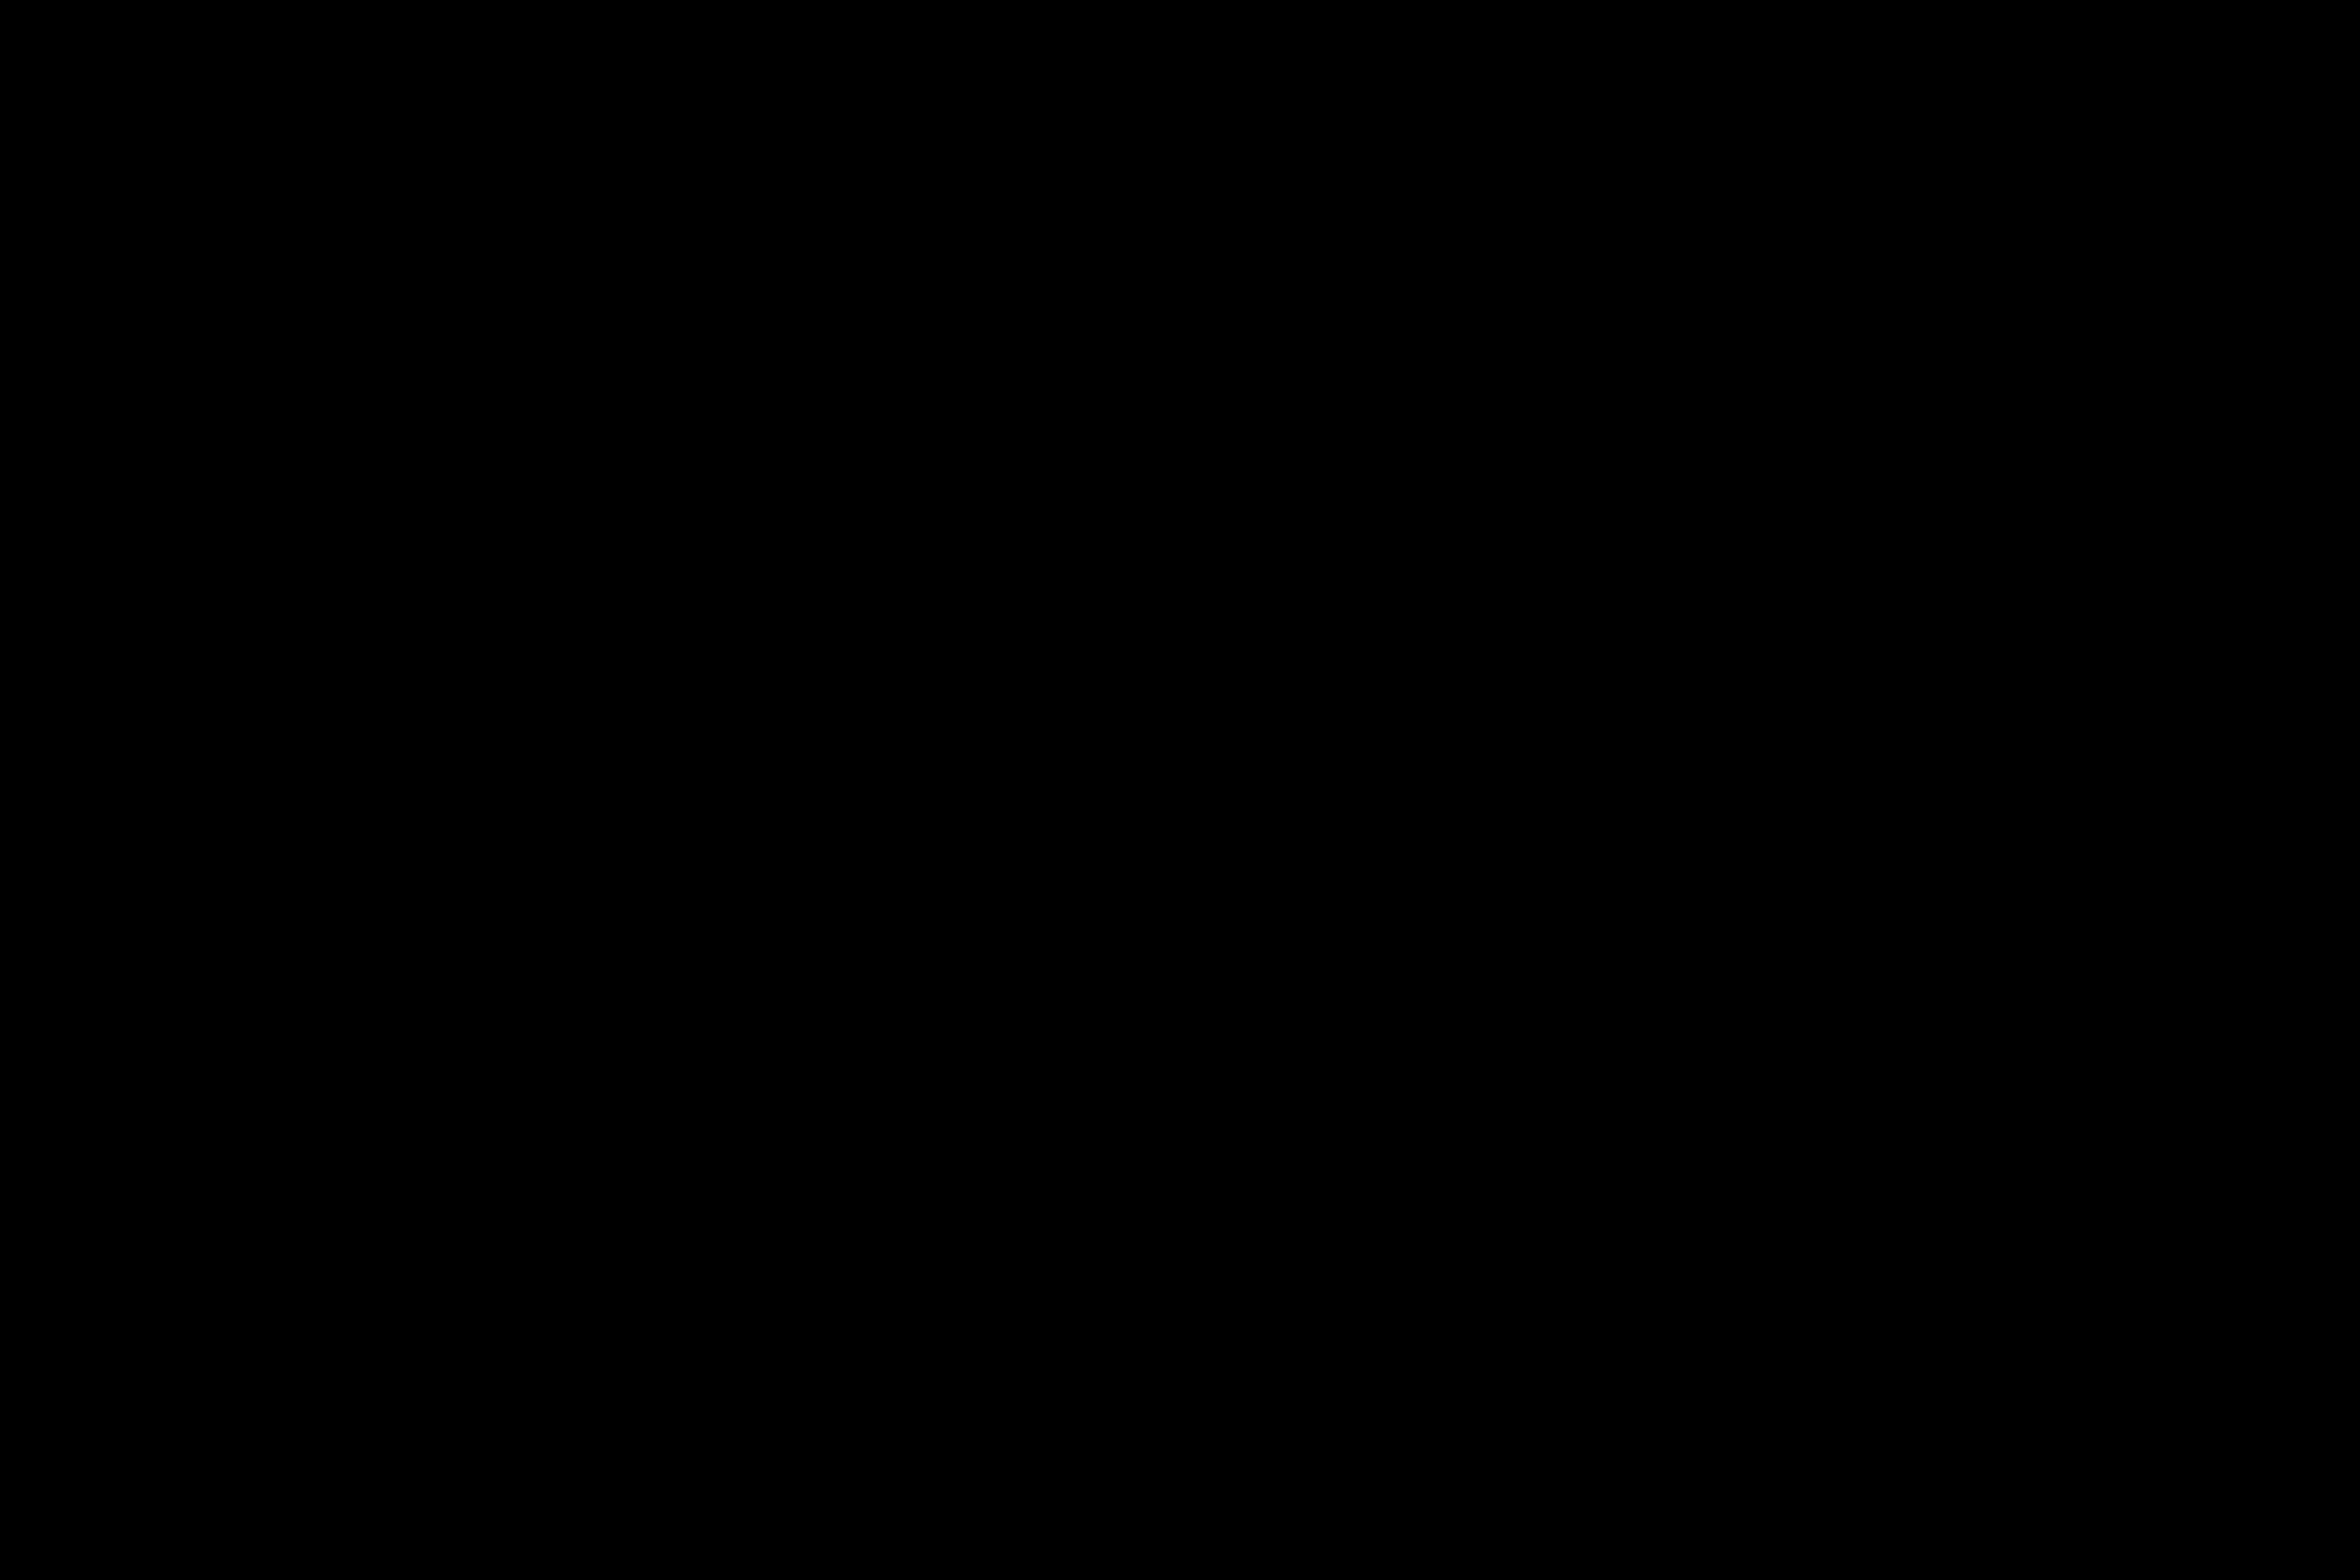

In [ ]:
cv2_imshow(img16)

In [ ]:
for i in range(Height):
  for j in range(Width):
    img16[i][j]=img15[i][j]

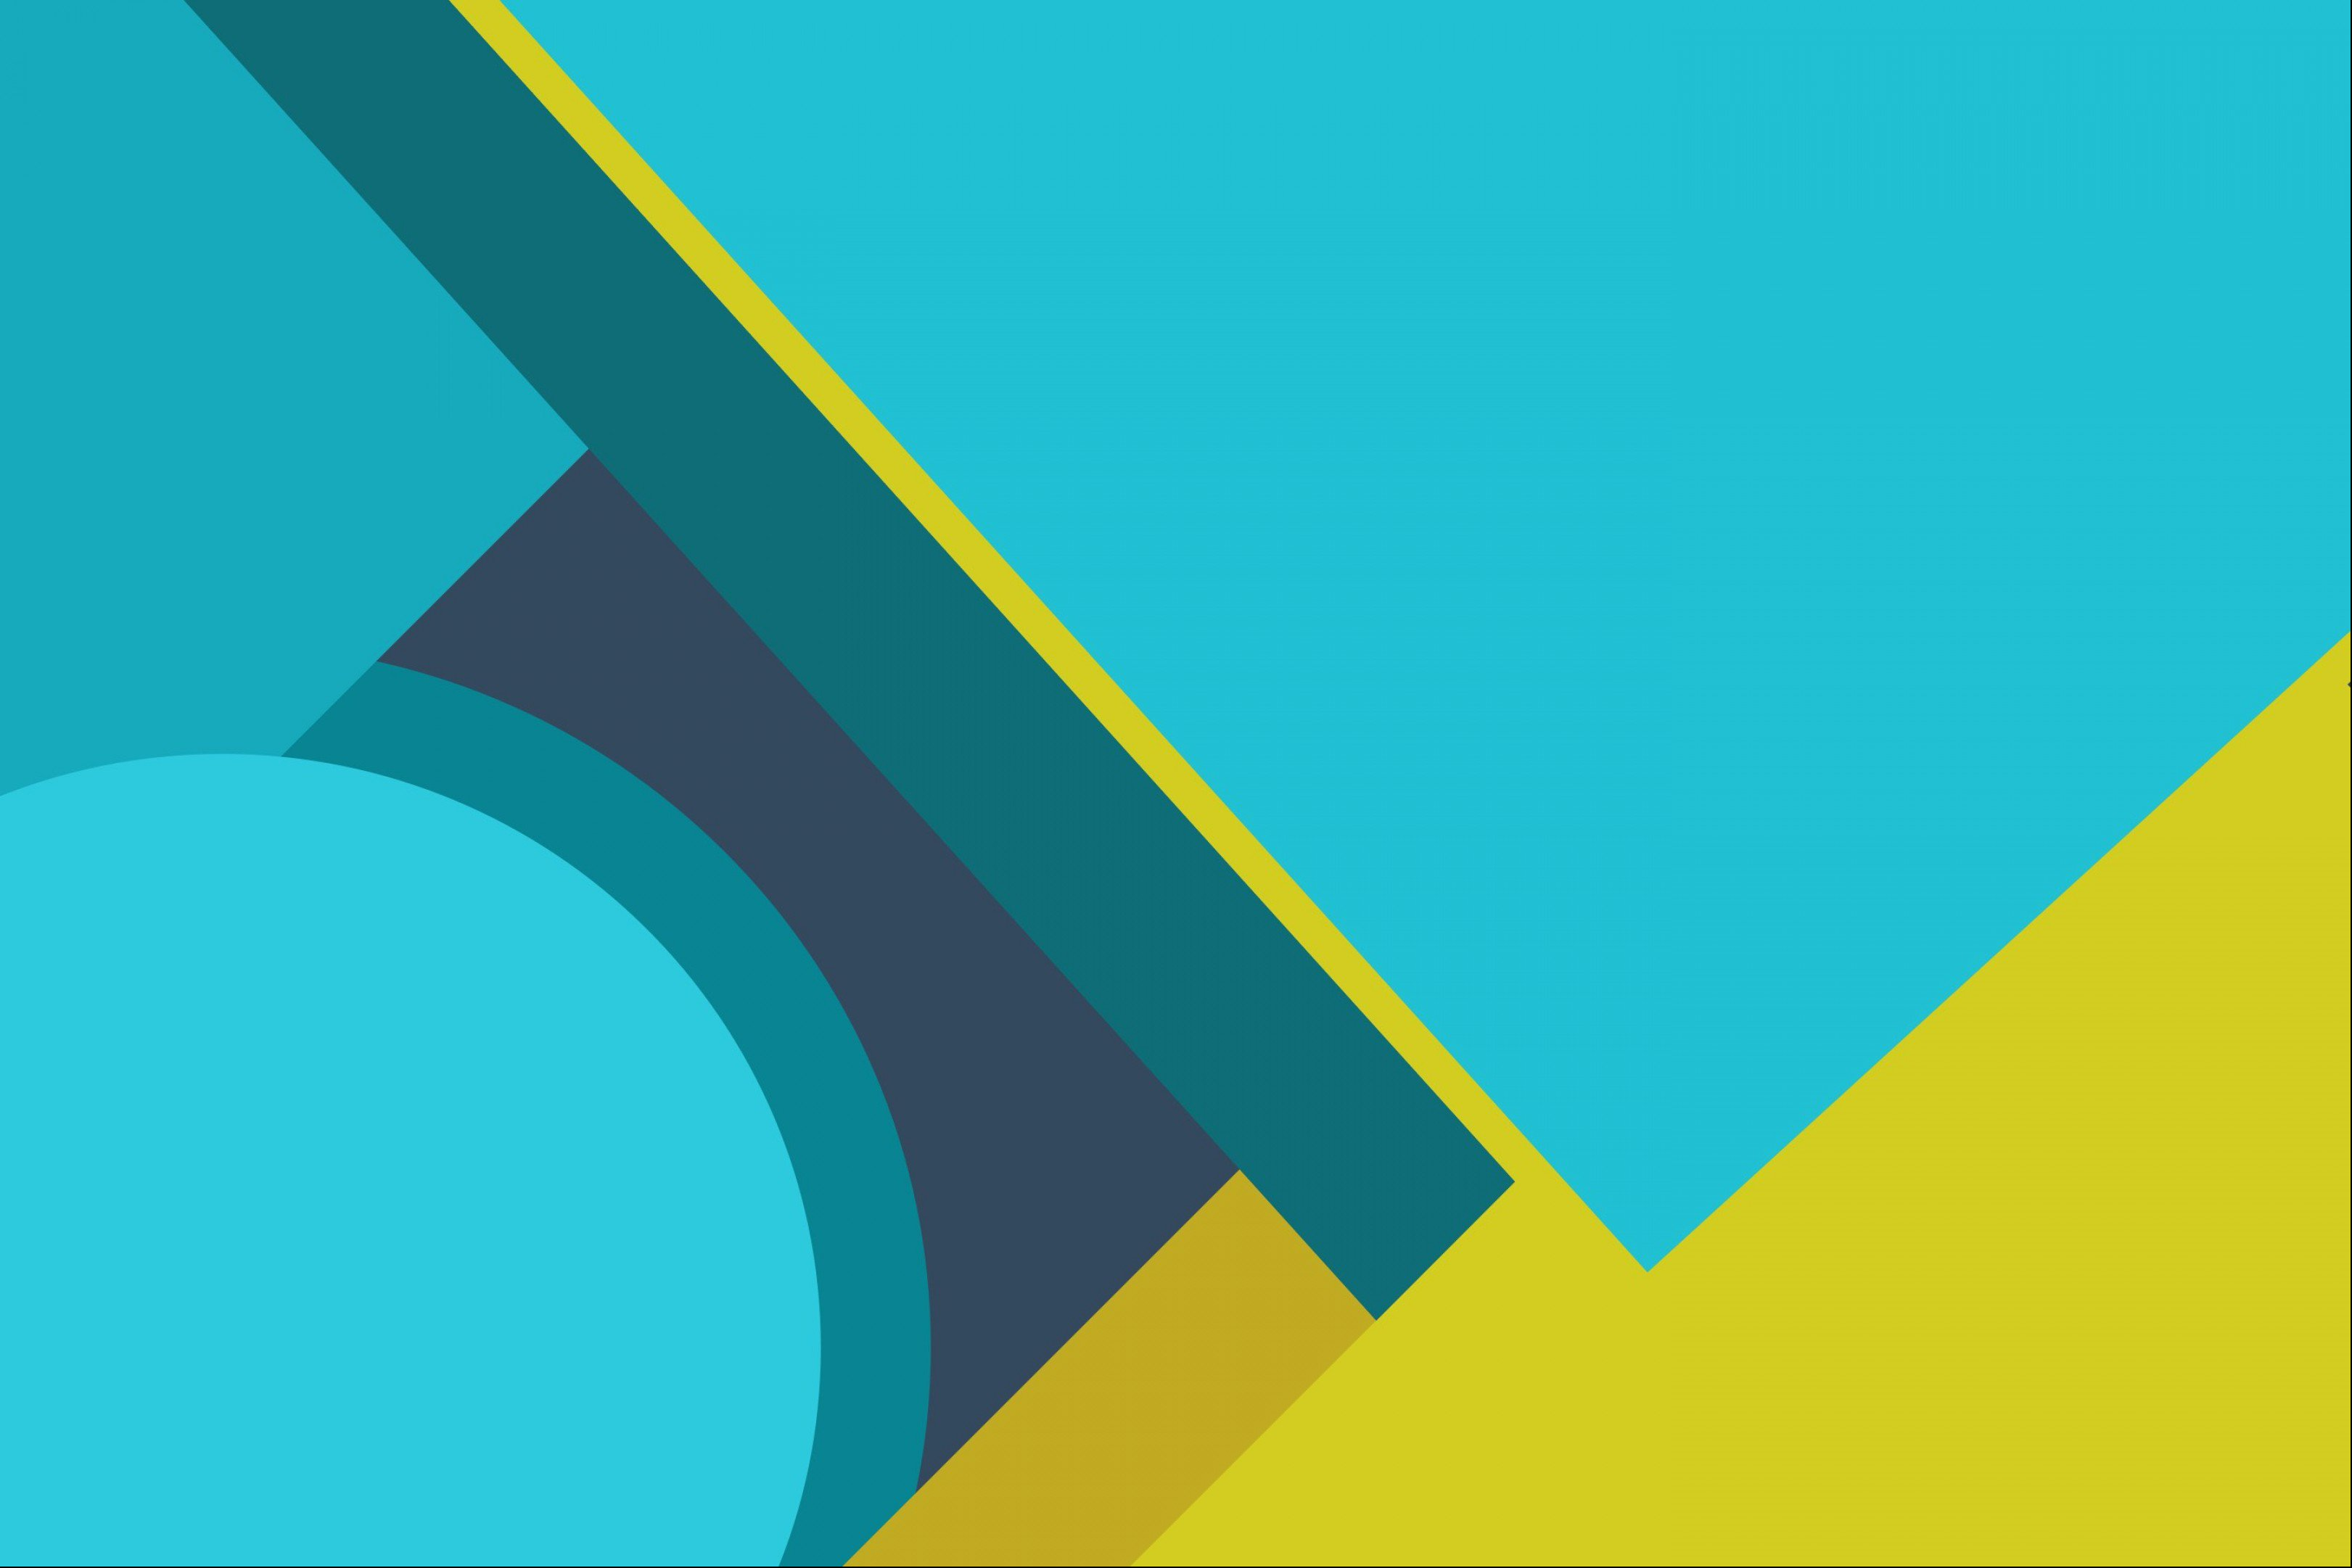

In [ ]:
cv2_imshow(img16)

In [ ]:
img16.shape

(2162, 3242, 3)

In [ ]:
filter=[[-1,0,1],[-1,0,1],[-1,0,1]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in add
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


Row edge detection:


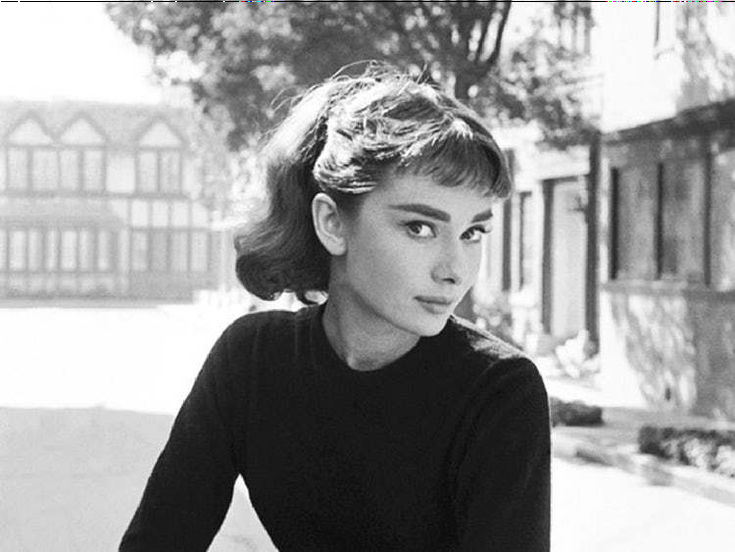

In [ ]:
for x in range(1,Height):
  for y in range(1,Width):
    val=0
    indx=0
    for i in range(x-1,x+2):
      indy=0
      for j in range(y-1,y+2):
          val+=filter[indx][indy]*img16[i][j]
          indy+=1
    img16[x][y]=val
    indx+=1
print("Row edge detection:")
cv2_imshow(img)